In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bathsheba
Processing Record 2 of Set 1 | praia da vitoria
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | iquique
Processing Record 6 of Set 1 | moron
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | nordby
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | elko
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | lakselv
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | emerald
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | olafsvik
Processing Record 23 of Set 1 | mataura
Processing Record 

Processing Record 39 of Set 4 | redmond
Processing Record 40 of Set 4 | farah
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | dali
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | metro
Processing Record 45 of Set 4 | kristiinankaupunki
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | iguape
Processing Record 48 of Set 4 | rungata
City not found. Skipping...
Processing Record 49 of Set 4 | ao luk
City not found. Skipping...
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | satitoa
City not found. Skipping...
Processing Record 2 of Set 5 | adil-yangiyurt
Processing Record 3 of Set 5 | mayo
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | finschhafen
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | sola
Processing Record 8 of Set 5 | wadena
Processing Record 9 of Set 5 | katangli
Processing Record 10 of Set 5 | 

Processing Record 25 of Set 8 | dhidhdhoo
Processing Record 26 of Set 8 | campo grande
Processing Record 27 of Set 8 | viligili
City not found. Skipping...
Processing Record 28 of Set 8 | port lincoln
Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | lebedinyy
Processing Record 31 of Set 8 | cidreira
Processing Record 32 of Set 8 | ballitoville
Processing Record 33 of Set 8 | tokur
Processing Record 34 of Set 8 | lokoja
Processing Record 35 of Set 8 | yaan
Processing Record 36 of Set 8 | kuche
City not found. Skipping...
Processing Record 37 of Set 8 | virden
Processing Record 38 of Set 8 | vrangel
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | nemuro
Processing Record 41 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | xining
Processing Record 45 of Set 8 | tahta
Processing Record 46 of Set 

Processing Record 12 of Set 12 | polson
Processing Record 13 of Set 12 | luwuk
Processing Record 14 of Set 12 | kidal
Processing Record 15 of Set 12 | jamame
Processing Record 16 of Set 12 | jasper
Processing Record 17 of Set 12 | umm lajj
Processing Record 18 of Set 12 | shache
Processing Record 19 of Set 12 | mackay
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | husavik
Processing Record 22 of Set 12 | kamaishi
Processing Record 23 of Set 12 | northam
Processing Record 24 of Set 12 | huangmei
Processing Record 25 of Set 12 | pangai
Processing Record 26 of Set 12 | kalmunai
Processing Record 27 of Set 12 | makueni
Processing Record 28 of Set 12 | lucea
Processing Record 29 of Set 12 | chlumec nad cidlinou
Processing Record 30 of Set 12 | pedasi
Processing Record 31 of Set 12 | hamilton
Processing Record 32 of Set 12 | campos belos
Processing Record 33 of Set 12 | comodoro rivadavia
Processing Record 34 of Set 12 | bowen
Processing Record 35 of Set 12 | ca

In [7]:
len(city_data)

567

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.2167,-59.5167,78.80,69,40,8.05,BB,2021-04-14 23:36:21
1,Praia Da Vitoria,38.7333,-27.0667,60.80,88,20,2.42,PT,2021-04-14 23:35:22
2,Ancud,-41.8697,-73.8203,51.01,83,47,5.99,CL,2021-04-14 23:36:29
3,Butaritari,3.0707,172.7902,81.39,78,86,7.54,KI,2021-04-14 23:35:29
4,Iquique,-20.2208,-70.1431,66.20,68,20,10.36,CL,2021-04-14 23:33:58
5,Moron,-34.6534,-58.6198,69.01,69,1,5.03,AR,2021-04-14 23:33:17
6,Upernavik,72.7868,-56.1549,-10.10,99,97,4.94,GL,2021-04-14 23:36:08
7,Pisco,-13.7000,-76.2167,68.00,77,0,13.80,PE,2021-04-14 23:36:30
8,Nordby,55.4460,8.3979,35.60,64,50,3.44,DK,2021-04-14 23:36:30
9,Tomatlan,19.9333,-105.2500,84.47,41,4,9.10,MX,2021-04-14 23:36:31


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bathsheba,BB,2021-04-14 23:36:21,13.2167,-59.5167,78.80,69,40,8.05
1,Praia Da Vitoria,PT,2021-04-14 23:35:22,38.7333,-27.0667,60.80,88,20,2.42
2,Ancud,CL,2021-04-14 23:36:29,-41.8697,-73.8203,51.01,83,47,5.99
3,Butaritari,KI,2021-04-14 23:35:29,3.0707,172.7902,81.39,78,86,7.54
4,Iquique,CL,2021-04-14 23:33:58,-20.2208,-70.1431,66.20,68,20,10.36
5,Moron,AR,2021-04-14 23:33:17,-34.6534,-58.6198,69.01,69,1,5.03
6,Upernavik,GL,2021-04-14 23:36:08,72.7868,-56.1549,-10.10,99,97,4.94
7,Pisco,PE,2021-04-14 23:36:30,-13.7000,-76.2167,68.00,77,0,13.80
8,Nordby,DK,2021-04-14 23:36:30,55.4460,8.3979,35.60,64,50,3.44
9,Tomatlan,MX,2021-04-14 23:36:31,19.9333,-105.2500,84.47,41,4,9.10


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

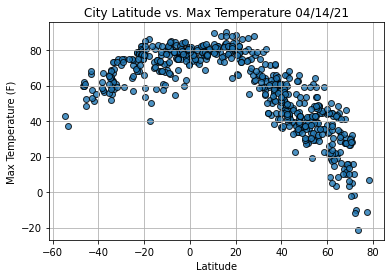

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

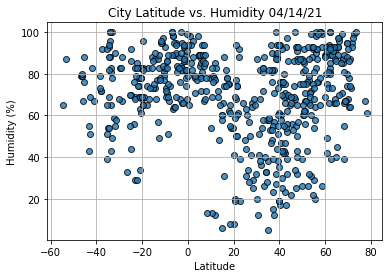

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

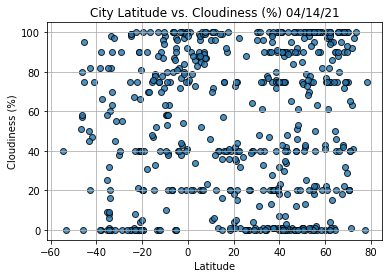

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

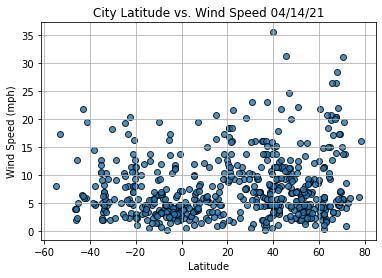

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

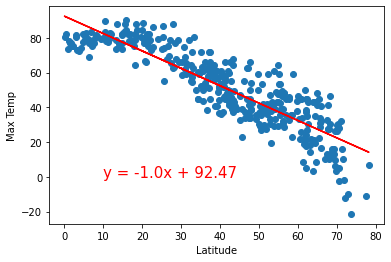

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp', (10,0))

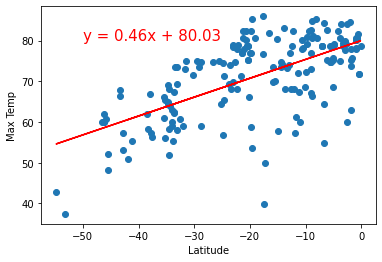

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

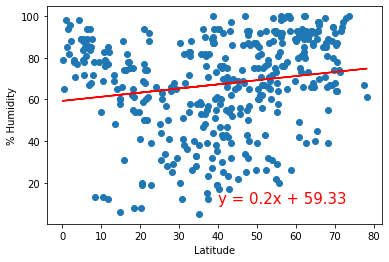

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

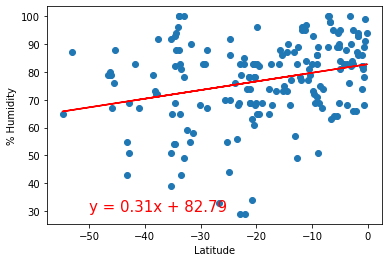

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

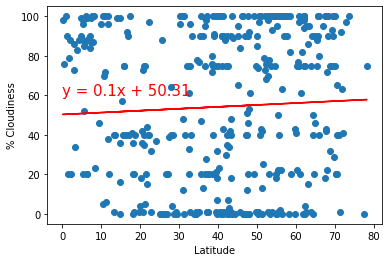

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))



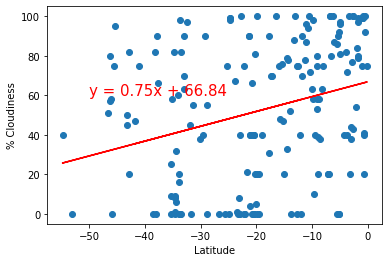

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))



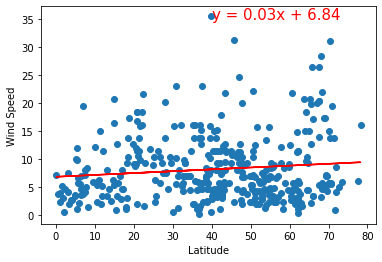

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

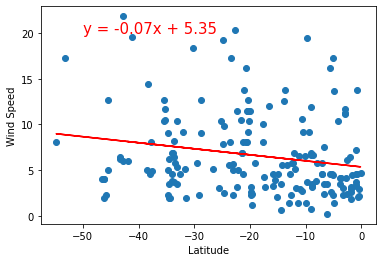

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))